In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
df=pd.read_csv('../Data/raw/Fraud_Data(2).csv')
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [4]:
df.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [5]:
df.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [6]:
df_duplicate=df.drop_duplicates()

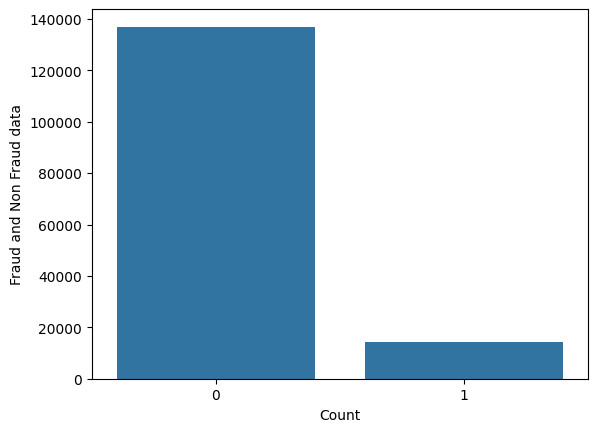

In [7]:
data=df_duplicate['class'].value_counts().reset_index()
plt.Figure(figsize=(10,8))
sns.barplot(data=data,x='class',y='count' )
plt.xlabel('Count')
plt.ylabel('Fraud and Non Fraud data')
plt.show()

In [34]:
df_duplicate['signup_time']=pd.to_datetime(df_duplicate['signup_time'])
df_duplicate['purchase_time']=pd.to_datetime(df_duplicate['purchase_time'])
df_duplicate['dates']=df_duplicate['purchase_time'].dt.date
df_duplicate['hour']=df_duplicate['purchase_time'].dt.hour
df_duplicate['time_since_signup']=(df_duplicate['purchase_time']-df_duplicate['signup_time']).dt.days
df_duplicate['day_of_the_week']=df_duplicate['purchase_time'].dt.day_name()
df_hourly=df_duplicate.groupby(['hour','class']).size().reset_index(name='Transaction_count')
df_daily=df_duplicate.groupby(['day_of_the_week','class']).size().reset_index(name='Transaction_count')

Time Based Variables

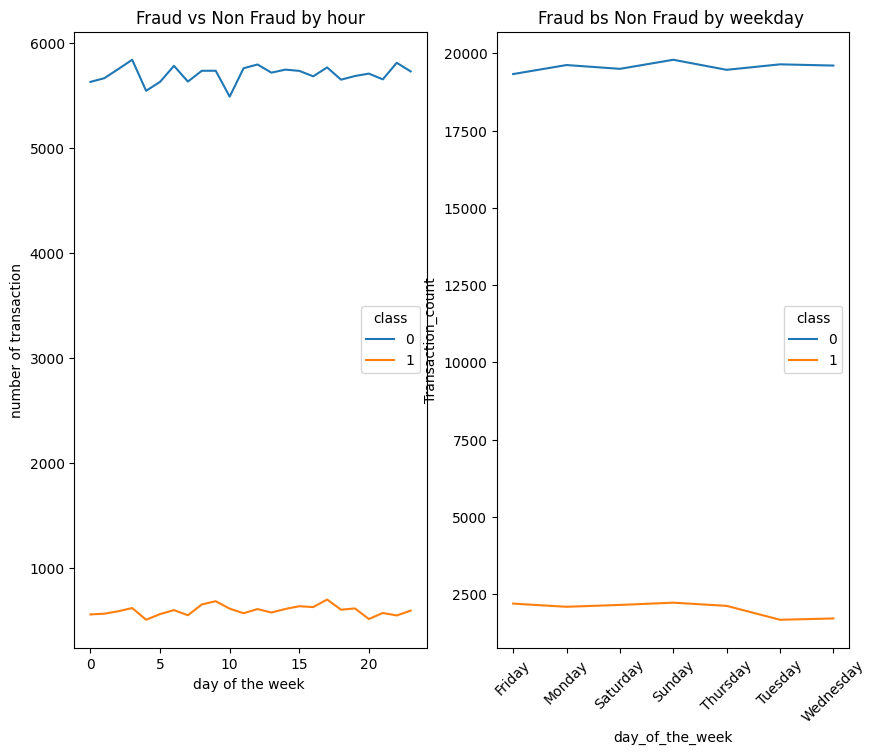

In [9]:

fig,(axis1,axis2)=plt.subplots(ncols=2,figsize=(10,8))
sns.lineplot(ax=axis1,data=df_hourly,x='hour',y='Transaction_count',hue='class')
sns.lineplot(ax=axis2,data=df_daily,x='day_of_the_week',y='Transaction_count',hue='class')
axis1.set_title("Fraud vs Non Fraud by hour")
axis1.set_xlabel('hour')
axis1.set_ylabel('number of transaction')
axis2.set_title("Fraud bs Non Fraud by weekday ")
axis1.set_xlabel('day of the week ')
axis1.set_ylabel('number of transaction')
plt.xticks(rotation=45)
plt.show()

# how Purchase value and Age, is realted to fraud is there correlation 
# do fraudelent transaction has higher average amounts?

C:\Users\Hp\AppData\Local\Temp\ipykernel_11992\1720610830.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_purchase_fraud=df_fraud.groupby('purchase_bin').size().reset_index(name='purchase_fraud')


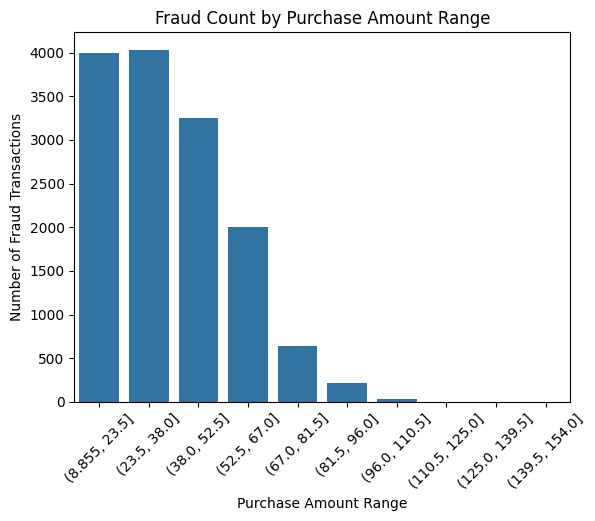

In [57]:
df_duplicate['purchase_bin']=pd.cut(df_duplicate['purchase_value'],bins=10)

df_fraud=df_duplicate[df_duplicate['class']==1]
df_purchase_fraud=df_fraud.groupby('purchase_bin').size().reset_index(name='purchase_fraud')
plt.Figure(figsize=(15,12))
sns.barplot(data=df_purchase_fraud,x='purchase_bin',y='purchase_fraud')
plt.title('Fraud Count by Purchase Amount Range')
plt.xlabel('Purchase Amount Range')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)
plt.show()


In [58]:
df_duplicate['ip_address']=df_duplicate['ip_address'].astype(int)
fraud_data=df_duplicate.copy()
country_data=pd.read_csv('../Data/raw/IpAddress_to_Country.csv')



In [ ]:
#!pip install IntervalTree
from intervaltree import IntervalTree

tree = IntervalTree()

for idx, row in country_data.iterrows():
    tree[row['lower_bound_ip_address']: row['upper_bound_ip_address'] + 1] = row['country']


def detect_country_fast(ip):
    matches = tree[ip]
    if matches:
        return list(matches)[0].data  
    else:
        return 'Unknown'


fraud_data['ip_country'] = fraud_data['ip_address'].apply(detect_country_fast)
